In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
data1=np.array([1,2,3,4,5,6])
data1

array([1, 2, 3, 4, 5, 6])

In [3]:
np.random.seed(0)
np.random.choice(data1,size=6,replace=True)

array([5, 6, 1, 4, 4, 4])

In [4]:
np.random.choice(data1,size=6,replace=True)

array([2, 4, 6, 3, 5, 1])

In [5]:
np.random.choice(data1,size=6,replace=True)

array([1, 5, 3, 2, 1, 2])

In [6]:
data2="c:/temp/iris.csv"
iris=pd.read_csv(data2)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
np.random.seed(0)
iris_100=iris.iloc[np.random.randint(150,size=100)]
iris_100

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
47,4.6,3.2,1.4,0.2,setosa
117,7.7,3.8,6.7,2.2,virginica
67,5.8,2.7,4.1,1.0,versicolor
103,6.3,2.9,5.6,1.8,virginica
9,4.9,3.1,1.5,0.1,setosa
...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,virginica
114,5.8,2.8,5.1,2.4,virginica
43,5.0,3.5,1.6,0.6,setosa
127,6.1,3.0,4.9,1.8,virginica


# 1. Bagging

- 먼저 iris 150obs 있는 걸 train-test set으로 구분하자.
- train 70%(150*0.7=105), test 30%
- bagging: train set 105개에서 105개로 된 데이터를 무작위로 10번 뽑아서 나무 10개, bagging을 10번 한다.

In [8]:
X=iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris['Species']

In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [10]:
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# train, test set으로 구분하기

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [13]:
X_train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [14]:
X_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


### 이제 bagging 을 하자

- 지금은 y변수가 Species 가 범주형이니까 RandomForestClassifier
- y변수가 연속형이면 RandomForestRegressor

In [15]:
bag1=RandomForestClassifier(n_estimators=10,max_features=None, random_state=0, max_depth=2)
bag1

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=10,
                       random_state=0)

In [16]:
result1=bag1.fit(X_train,y_train)
result1

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=10,
                       random_state=0)

In [17]:
pred1=result1.predict(X_test)
pred1

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [18]:
confusion_matrix(y_test,pred1)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  3,  8]], dtype=int64)

In [19]:
# CCR 값
41/45

0.9111111111111111

In [20]:
bag2=RandomForestClassifier(n_estimators=100,max_features=None, random_state=0, max_depth=2)
bag2

RandomForestClassifier(max_depth=2, max_features=None, random_state=0)

In [21]:
result2=bag2.fit(X_train,y_train)
pred2=result2.predict(X_test)
confusion_matrix(y_test,pred2)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [22]:
# CCR : n_estimators=100
43/45

0.9555555555555556

In [23]:
bag3=RandomForestClassifier(n_estimators=500,max_features=None, random_state=0, max_depth=2)
result3=bag3.fit(X_train,y_train)
pred3=result3.predict(X_test)
confusion_matrix(y_test,pred3)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [24]:
# CCR : n_estimators=500
44/45

0.9777777777777777

In [25]:
# n_estimators : 나무 몇개 만드는지
# 많이 한다고 크게 성과가 좋아지는 건 아님

# 2. Random Forest

## bagging과 random forest의 차이

1) rf는 train set 중 2/3 만 사용. train set 전체 사용: bagging
2) X 변수 중 몇가지만 사용 : rf / X 변수 전체 사용 : bagging
- rf가 X 변수 중 몇가지만 사용하는 이유 : uncorrelated 된 나무 만들기 위해
- 몇가지사용? : x 변수 개수가 p개이면, sqrt(p)개만 사용

- RandomForest 의 장점: 대규모 데이터에서 적절
- RandomForest 의 단점: 나무의 구조가 눈에 보이면 결과를 이해하기 쉬운데, bg나 rf는 나무를 많이 사용하니까, 나무를 그릴 수 없음. 따라서 눈에 들어오는 겨로가가 없다. 
ex. 맨 위 변수가 가장 중요한 변수인데 그런 걸 나무 못 그리니까 알 수 없음.



In [26]:
rf1=RandomForestClassifier(n_estimators=10,max_features='auto',max_samples=0.66,random_state=0,max_depth=2)

In [27]:
result4=rf1.fit(X_train,y_train)
result4

RandomForestClassifier(max_depth=2, max_samples=0.66, n_estimators=10,
                       random_state=0)

In [28]:
pred4=result4.predict(X_test)
pred4

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [29]:
confusion_matrix(y_test,pred4)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]], dtype=int64)

In [30]:
# CCR
# 교수님은 하나 틀렸는데, 난 여전히 두개 틀림. 나중에 강의 확인해보기

### y: 연속형 변수인 경우 RandomForestRegressor

In [31]:
file3="c:/temp/Boston.csv"
data3=pd.read_csv(file3)
data3

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [32]:
X=data3.drop('medv',axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [33]:
y=data3['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [43]:
# train, test split을 우선 나눠야 bagging이든 random forest이든 한다

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0)

In [36]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [37]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54


In [42]:
# y가 연속형일 때 bagging

In [39]:
bag5=RandomForestRegressor(n_estimators=100,max_features=None,random_state=0,max_depth=3)
result5=bag5.fit(X_train,y_train)
pred5=result5.predict(X_test)
# max_features=None 이면 bagging, max_features='auto'이면 random forest
pred5

array([23.88975469, 28.17639323, 21.27493   , 11.96101789, 21.12242157,
       22.84831025, 21.11407711, 22.78273757, 21.40948087, 21.11407711,
       11.76071032, 13.8224608 , 14.26714677, 11.85239512, 46.47978502,
       32.06438648, 21.23522309, 33.65060522, 25.45730599, 22.87700859,
       23.82948153, 21.23037362, 21.06952073, 23.88975469, 21.29395045,
       20.80304458, 21.03345008, 15.56617588, 44.15604435, 17.05959916,
       14.34376608, 17.74545518, 21.4724336 , 21.25457613, 22.84824885,
       17.63915163, 11.91251098, 28.46922082, 14.58546744, 15.7376808 ,
       22.9740947 , 21.19274022, 23.07982991, 15.42448704, 23.57651631,
       22.90852201, 17.88608446, 15.58506086, 14.31729825, 25.18418114,
       16.16561535, 16.97757703, 21.21309409, 40.09428719, 16.22840341,
       17.85484622, 21.19274022, 21.12242157, 24.22748383, 17.02583959,
       23.60855013, 21.09896136, 31.18572938, 29.26504227, 17.88859171,
       27.1202953 , 15.74683604, 17.08767549, 17.64684667, 21.20

In [40]:
# y가 연속형이면 예측 성과 판단할 때: MSE

mean_squared_error(y_test,pred5)

17.857767501639618

In [41]:
# MSE 작을 수록 좋음.

In [44]:
# y가 연속형일 떄 random forest

In [54]:
rf6=RandomForestRegressor(n_estimators=100,max_features='auto',max_samples=0.66,random_state=0,max_depth=3)
result6=rf6.fit(X_train,y_train)
pred6=result6.predict(X_test)
pred6

array([23.50382171, 25.54487929, 21.19510425, 11.92906734, 21.2475276 ,
       22.47792474, 21.55819085, 22.4400132 , 21.76214854, 21.28333216,
       11.84840852, 14.0493638 , 14.70837253, 11.69164818, 46.97528517,
       31.72443059, 21.50713015, 33.62170673, 25.08312709, 22.47792474,
       23.42115463, 21.03914743, 21.09256192, 23.42115463, 21.31696376,
       20.9624096 , 21.14153688, 15.12847893, 43.20880674, 17.16397375,
       14.76129945, 18.04724034, 21.50427806, 21.21369445, 22.47837875,
       17.46362789, 11.7589719 , 25.55823558, 14.80508852, 15.70743661,
       22.47792474, 21.1647195 , 22.55651344, 15.62137696, 23.38920077,
       22.47837875, 17.98183211, 15.12847893, 13.95519349, 25.65661718,
       15.92567681, 17.27375919, 21.28061812, 41.37936704, 16.35791075,
       17.90837898, 21.21369445, 21.21369445, 23.41801728, 17.29262687,
       23.08532127, 21.21369445, 30.93179537, 29.72260575, 18.1099522 ,
       26.81091205, 16.02539182, 17.06194002, 18.46544091, 21.28

In [56]:
mean_squared_error(y_test,pred6)

19.639974504576372

In [49]:
# randomforest 할 때 x 변수 몇 개사용?
np.sqrt(13)

3.605551275463989

In [50]:
# 4개 사용

In [51]:
# 연속형 변수 일 때 MSE 가 클 수록 예측 별로임

In [57]:
# rf에서 어떤 변수가 상대적으로 중요한지 알 수 있는 방법
# => 변수의 중요성 측정하는 방법 Variable Importance Index : VIP

imp=result6.feature_importances_
imp
# array type으로 저장되어있다.

array([2.13681757e-02, 4.65869412e-04, 2.89659108e-03, 8.14505090e-04,
       1.32182661e-02, 4.93489561e-01, 4.21119016e-03, 3.02357322e-02,
       2.12648443e-03, 4.74239267e-03, 9.71116968e-03, 3.51993027e-03,
       4.13200132e-01])

## vip 값 해석 ex) x 변수 13개에 대한 vip 값.

근데 random forest 할 때 4개만 쓴거 아냐?

매번 데이터셋 만들때마다 다른 4개변수 사용하니까, 모든 변수에 대한 vip값이 나오는건가?


e=10^-1

2.13681757e-02=0.021 엥?????? 나중에 강의 다시 듣기



숫자 : 그 변수 빼고 나머지 변수로 random forest 돌린거랑, 그 변수 넣고 돌린거랑 차이인데, 얼마나 넣었을 때 없을 때 보다 더 개선되는가!

즉 클수록 중요한 변수





 

In [58]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54


In [60]:
# bar graph로 한눈에 뭐가 제일 중요한 변수인지 보자

# 먼저 array type으로 된 imp를 data frame으로 변경하자

imp1=pd.DataFrame({'importance':imp},index=X.columns)
imp1

,importance
crim,0.021368
zn,0.000466
indus,0.002897
chas,0.000815
nox,0.013218
rm,0.493490
age,0.004211
dis,0.030236
rad,0.002126
tax,0.004742


In [61]:
# 시험 : 가장 중요한 변수= 가장 숫자 높은 변수 = rm, 가장 안주요한 변수 = 가장 숫자 작은 변수 = zn

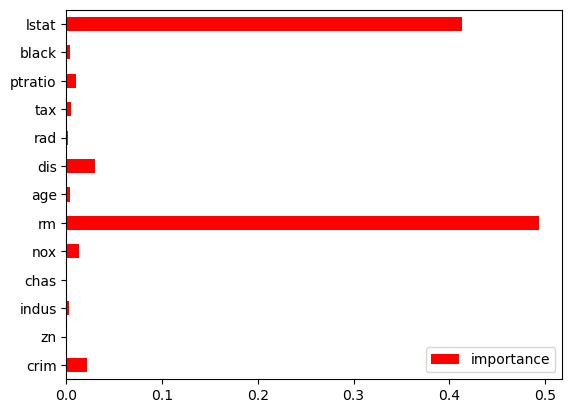

In [62]:
# bar graph 그리자

imp1.plot(kind='barh',color='red')
plt.show()

In [63]:
# 순서대로 예쁘게 그리기

imp1.sort_values('importance',ascending=True,inplace=True)
imp1

,importance
zn,0.000466
chas,0.000815
rad,0.002126
indus,0.002897
black,0.003520
age,0.004211
tax,0.004742
ptratio,0.009711
nox,0.013218
crim,0.021368


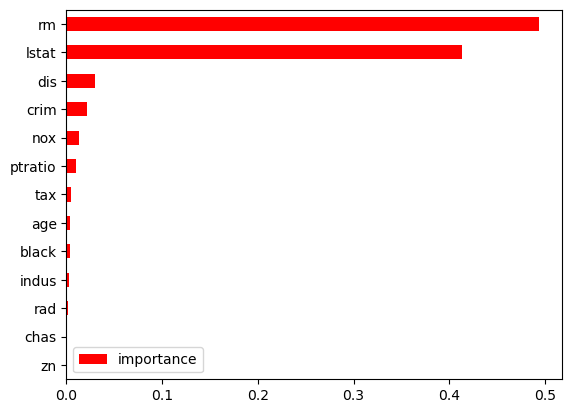

In [64]:
imp1.plot(kind='barh',color='red')
plt.show()

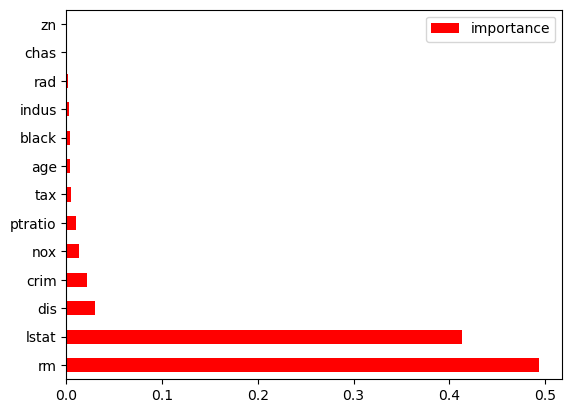

In [65]:
imp1.sort_values('importance',ascending=False,inplace=True)
imp1.plot(kind='barh',color='red')
plt.show()